# Illustrating Python via Bioinformatics

The genetic code of all living organisms are represented by a long sequence of simple molecules called nucleotides, or bases, which makes up the Deoxyribonucleic acid, better known as DNA. There are only four such nucleotides, and the entire genetic code of a human can be seen as a simple, though 3 billion long, string of the letters A, C, G, and T. Analyzing DNA data to gain increased biological understanding is much about searching in (long) strings for certain string patterns involving the letters A, C, G, and T. This is an integral part of bioinformatics, a scientific discipline addressing the use of computers to search for, explore, and use information about genes, nucleic acids, and proteins. 

# Basic Bioinformatics Examples in Python 

 The instructions to the computer how the analysis is going to be performed are specified using the Python programming language. The forthcoming examples are simple illustrations of the type of problem settings and corresponding Python implementations that are encountered in bioinformatics. However, the leading Python software for bioinformatics applications is BioPython and for real-world problem solving one should rather utilize BioPython instead of home-made solutions. The aim of the sections below is to illustrate the nature of bioinformatics analysis and introduce what is inside packages like BioPython.

We shall start with some very simple examples on DNA analysis that bring together basic building blocks in programming: loops, if tests, and functions. As reader you should be somewhat familiar with these building blocks in general and also know about the specific Python syntax. 

# Counting Letters in DNA Strings

 Given some string dna containing the letters A, C, G, or T, representing the bases that make up DNA, we ask the question: how many times does a certain base occur in the DNA string? For example, if dna is ATGGCATTA and we ask how many times the base A occur in this string, the answer is 3.

A general Python implementation answering this problem can be done in many ways. Several possible solutions are presented below. 

# List Iteration 

The most straightforward solution is to loop over the letters in the string, test if the current letter equals the desired one, and if so, increase a counter. Looping over the letters is obvious if the letters are stored in a list. This is easily done by converting a string to a list: 

In [1]:
list('ATGC')

['A', 'T', 'G', 'C']

In [2]:
#Our first solution becomes
def count_v1(dna, base):
    dna = list(dna)  # convert string to list of letters
    i = 0            # counter
    for c in dna:
        if c == base:
            i += 1
    return i

# String Iteration 

In [4]:
#Python allows us to iterate directly over a string without converting it to a list: 
for c in 'ATGC':
...     print (c)

A
T
G
C


 In fact, all built-in objects in Python that contain a set of elements in a particular sequence allow a for loop construction of the type for element in object.

A slight improvement of our solution is therefore to iterate directly over the string: 

In [9]:
def count_v2(dna, base):
    i = 0 # counter
    for c in dna:
        if c == base:
            i += 1
    return i

dna = 'ATGCGGACCTAT'
base = 'C'
n = count_v2(dna, base)

# printf-style formatting
#print '%s appears %d times in %s' %(base, n, dna)

# or (new) format string syntax
#print '{base} appears {n} times in {dna}'.format(base=base, n=n, dna=dna)

We have here illustrated two alternative ways of writing out text where the value of variables are to be inserted in "slots" in the string. 

# Program Flow 

 It is fundamental for correct programming to understand how to simulate a program by hand, statement by statement. Three tools are effective for helping you reach the required understanding of performing a simulation by hand:

    printing variables and messages,
    using a debugger,
    using the Online Python Tutor.

Inserting print statements and examining the variables is the simplest approach to investigating what is going on: 

In [ ]:
def count_v2_demo(dna, base):
    print 'dna:', dna
    print 'base:', base
    i = 0 # counter
    for c in dna:
        print 'c:', c
        if c == base:
            print 'True if test'
            i += 1
    return i

n = count_v2_demo('ATGCGGACCTAT', 'C')

An efficient way to explore this program is to run it in a debugger where we can step through each statement and see what is printed out. Start ipython in a terminal window and run the program count_v2_demo.py with a debugger: run -d count_v2_demo.py. Use s (for step) to step through each statement, or n (for next) for proceeding to the next statement without stepping through a function that is called. 

In [ ]:
ipdb> s
> /some/disk/user/bioinf/src/count_v2_demo.py(2)count_v2_demo()
1     1 def count_v1_demo(dna, base):
----> 2     print 'dna:', dna
      3     print 'base:', base

ipdb> s
dna: ATGCGGACCTAT
> /some/disk/user/bioinf/src/count_v2_demo.py(3)count_v2_demo()
      2     print 'dna:', dna
----> 3     print 'base:', base
      4     i = 0 # counter

Observe the output of the print statements. One can also print a variable explicitly inside the debugger: 

In [ ]:
ipdb> print base
C

The Online Python Tutor is, at least for small programs, a splendid alternative to debuggers. Go to the web page, erase the sample code and paste in your own code. Press Visual execution, then Forward to execute statements one by one. The status of variables are explained to the right, and the text field below the program shows the output from print statements. An example is shown below

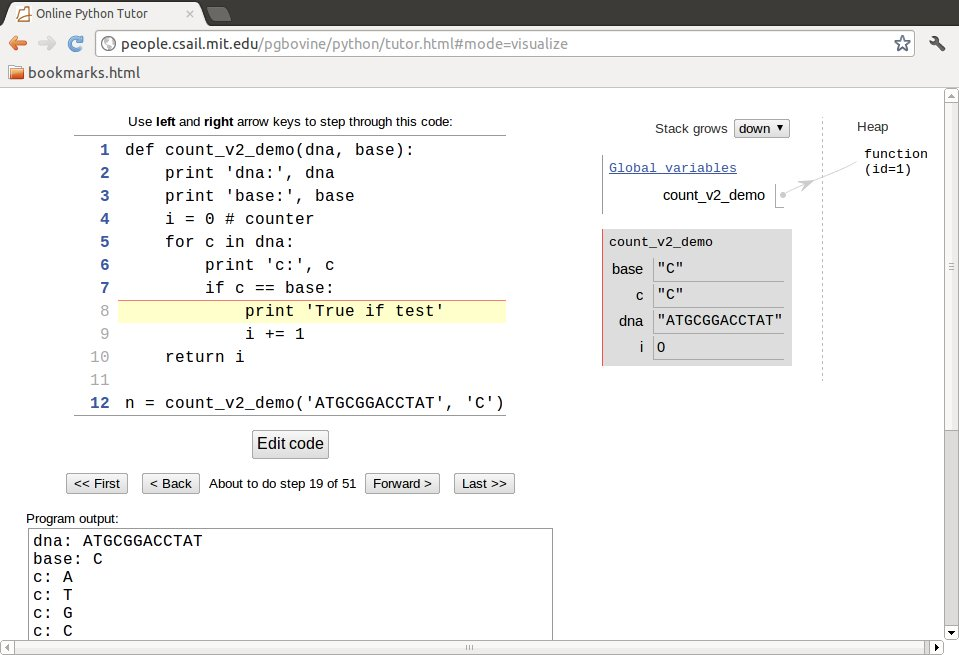

Misunderstanding of the program flow is one of the most frequent sources of programming errors, so whenever in doubt about any program flow, use one of the three mentioned techniques to establish confidence! 

# Index Iteration 

Although it is natural in Python to iterate over the letters in a string (or more generally over elements in a sequence), programmers with experience from other languages (Fortran, C and Java are examples) are used to for loops with an integer counter running over all indices in a string or array: 

In [ ]:
def count_v3(dna, base):
    i = 0 # counter
    for j in range(len(dna)):
        if dna[j] == base:
            i += 1
    return i

Python indices always start at 0 so the legal indices for our string become 0, 1, ..., len(dna)-1, where len(dna) is the number of letters in the string dna. The range(x) function returns a list of integers 0, 1, ..., x-1, implying that range(len(dna)) generates all the legal indices for dna.

# While Loops 

The while loop equivalent to the last function reads 

In [ ]:
def count_v4(dna, base):
    i = 0 # counter
    j = 0 # string index
    while j < len(dna):
        if dna[j] == base:
            i += 1
        j += 1
    return i

Correct indentation is here crucial: a typical error is to fail indenting the j += 1 line correctly. 

# Summing a Boolean List 

The idea now is to create a list m where m[i] is True if dna[i] equals the letter we search for (base). The number of True values in m is then the number of base letters in dna. We can use the sum function to find this number because doing arithmetics with boolean lists automatically interprets True as 1 and False as 0. That is, sum(m) returns the number of True elements in m. A possible function doing this is 

In [ ]:
def count_v5(dna, base):
    m = []   # matches for base in dna: m[i]=True if dna[i]==base
    for c in dna:
        if c == base:
            m.append(True)
        else:
            m.append(False)
    return sum(m)

# Inline If Test 

 Shorter, more compact code is often a goal if the compactness enhances readability. The four-line if test in the previous function can be condensed to one line using the inline if construction: if condition value1 else value2. 

In [ ]:
def count_v6(dna, base):
    m = []   # matches for base in dna: m[i]=True if dna[i]==base
    for c in dna:
        m.append(True if c == base else False)
    return sum(m)


# Using Boolean Values Directly 

The inline if test is in fact redundant in the previous function because the value of the condition c == base can be used directly: it has the value True or False. This saves some typing and adds clarity, at least to Python programmers with some experience: 

In [ ]:
def count_v7(dna, base):
    m = []   # matches for base in dna: m[i]=True if dna[i]==base
    for c in dna:
        m.append(c == base)
    return sum(m)

# List Comprehensions 

Building a list with the aid of a for loop can often be condensed to a single line by using list comprehensions: [expr for e in sequence], where expr is some expression normally involving the iteration variable e. In our last example, we can introduce a list comprehension 

In [ ]:
def count_v8(dna, base):
    m = [c == base for c in dna]
    return sum(m)


Here it is tempting to get rid of the m variable and reduce the function body to a single line: 

In [ ]:
def count_v9(dna, base):
    return sum([c == base for c in dna])

# Using a Sum Iterator 

The DNA string is usually huge - 3 billion letters for the human species. Making a boolean array with True and False values therefore increases the memory usage by a factor of two in our sample functions count_v5 to count_v9. Summing without actually storing an extra list is desirable. Fortunately, sum([x for x in s]) can be replaced by sum(x for x in s), where the latter sums the elements in s as x visits the elements of s one by one. Removing the brackets therefore avoids first making a list before applying sum to that list. This is a minor modification of the count_v9 function: 

In [ ]:
def count_v10(dna, base):
    return sum(c == base for c in dna)


 Below we shall measure the impact of the various program constructs on the CPU time.


# Extracting Indices 

Instead of making a boolean list with elements expressing whether a letter matches the given base or not, we may collect all the indices of the matches. This can be done by adding an if test to the list comprehension: 

In [ ]:
def count_v11(dna, base):
    return len([i for i in range(len(dna)) if dna[i] == base])

The Online Python Tutor is really helpful to reach an understanding of this compact code. Alternatively, you may play with the constructions in an interactive Python shell: 

In [ ]:
>>> dna = 'AATGCTTA'
>>> base = 'A'
>>> indices = [i for i in range(len(dna)) if dna[i] == base]
>>> indices
[0, 1, 7]
>>> print dna[0], dna[1], dna[7]  # check
A A A


Observe that the element i in the list comprehension is only made for those i where dna[i] == base. 

# Using Python's Library

Very often when you set out to do a task in Python, there is already functionality for the task in the object itself, in the Python libraries, or in third-party libraries found on the Internet. Counting how many times a letter (or substring) base appears in a string dna is obviously a very common task so Python supports it by the syntax dna.count(base): 

In [ ]:
def count_v12(dna, base):
    return dna.count(base)

def compare_efficiency():

# Efficiency Assessment

Now we have 11 different versions of how to count the occurrences of a letter in a string. Which one of these implementations is the fastest? To answer the question we need some test data, which should be a huge string dna. 

# Generating Random DNA Strings 

The simplest way of generating a long string is to repeat a character a large number of times: 

In [ ]:
N = 1000000
dna = 'A'*N

The resulting string is just 'AAA...A, of length N, which is fine for testing the efficiency of Python functions. Nevertheless, it is more exciting to work with a DNA string with letters from the whole alphabet A, C, G, and T. To make a DNA string with a random composition of the letters we can first make a list of random letters and then join all those letters to a string: 

In [ ]:
import random
alphabet = list('ATGC')
dna = [random.choice(alphabet) for i in range(N)]
dna = ''.join(dna)  # join the list elements to a string


 The random.choice(x) function selects an element in the list x at random.

Note that N is very often a large number. In Python version 2.x, range(N) generates a list of N integers. We can avoid the list by using xrange which generates an integer at a time and not the whole list. In Python version 3.x, the range function is actually the xrange function in version 2.x. Using xrange, combining the statements, and wrapping the construction of a random DNA string in a function, gives 

In [ ]:
import random

def generate_string(N, alphabet='ACGT'):
    return ''.join([random.choice(alphabet) for i in xrange(N)])

dna = generate_string(600000)

The call generate_string(10) may generate something like AATGGCAGAA. 

# Measuring CPU Time 

Our next goal is to see how much time the various count_v* functions spend on counting letters in a huge string, which is to be generated as shown above. Measuring the time spent in a program can be done by the time module: 

In [ ]:
import time
...
t0 = time.clock()
# do stuff
t1 = time.clock()
cpu_time = t1 - t0


 The time.clock() function returns the CPU time spent in the program since its start. If the interest is in the total time, also including reading and writing files, time.time() is the appropriate function to call.

Running through all our functions made so far and recording timings can be done by 

In [ ]:
import time
functions = [count_v1, count_v2, count_v3, count_v4,
             count_v5, count_v6, count_v7, count_v8,
             count_v9, count_v10, count_v11, count_v12]
timings = []  # timings[i] holds CPU time for functions[i]

for function in functions:
    t0 = time.clock()
    function(dna, 'A')
    t1 = time.clock()
    cpu_time = t1 - t0
    timings.append(cpu_time)

 In Python, functions are ordinary objects so making a list of functions is no more special than making a list of strings or numbers.

We can now iterate over timings and functions simultaneously via zip to make a nice printout of the results:

for cpu_time, function in zip(timings, functions):
    print '{f:<9s}: {cpu:.2f} s'.format(
        f=function.func_name, cpu=cpu_time)

Timings on a MacBook Air 11 running Ubuntu show that the functions using list.append require almost the double of the time of the functions that work with list comprehensions. Even faster is the simple iteration over the string. However, the built-in count functionality of strings (dna.count(base)) runs over 30 times faster than the best of our handwritten Python functions! The reason is that the for loop needed to count in dna.count(base) is actually implemented in C and runs very much faster than loops in Python.

A clear lesson learned is: google around before you start out to implement what seems to be a quite common task. Others have probably already done it for you, and most likely is their solution much better than what you can (easily) come up with.
Verifying the Implementations

We end this section with showing how to make tests that verify our 12 counting functions. To this end, we make a new function that first computes a certainly correct answer to a counting problem and then calls all the count_* functions, stored in the list functions, to check that each call has the correct result:

def test_count_all():
    dna = 'ATTTGCGGTCCAAA'
    exact = dna.count('A')
    for f in functions:
        if f(dna, 'A') != exact:
            print f.__name__, 'failed'

Here, we believe in dna.count('A') as the correct answer.

We might take this test function one step further and adopt the conventions in the pytest and nose testing frameworks for Python code.

These conventions say that the test function should

    have a name starting with test_;
    have no arguments;
    let a boolean variable, say success, be True if a test passes and be False if the test fails;
    create a message about what failed, stored in some string, say msg;
    use the construction assert success, msg, which will abort the program and write out the error message msg if success is False.

The pytest and nose test frameworks can search for all Python files in a folder tree, run all test_*() functions, and report how many of the tests that failed, if we adopt the conventions above. Our revised test function becomes

def test_count_all():
    dna = 'ATTTGCGGTCCAAA'
    expected = dna.count('A')

    functions = [count_v1, count_v2, count_v3, count_v4,
                 count_v5, count_v6, count_v7, count_v8,
                 count_v9, count_v10, count_v11, count_v12]
    for f in functions:
        success = f(dna, 'A') == expected
        msg = '%s failed' % f.__name__
        assert success, msg

It is worth notifying that the name of a function f, as a string object, is given by f.__name__, and we make use of this information to construct an informative message in case a test fails.

It is a good habit to write such test functions since the execution of all tests in all files can be fully automated. Every time you to a change in some file you can with minimum effort rerun all tests.

The entire suite of functions presented above, including the timings and tests, can be found in the file count.py.

Computing Frequencies

Your genetic code is essentially the same from you are born until you die, and the same in your blood and your brain. Which genes that are turned on and off make the difference between the cells. This regulation of genes is orchestrated by an immensely complex mechanism, which we have only started to understand. A central part of this mechanism consists of molecules called transcription factors that float around in the cell and attach to DNA, and in doing so turn nearby genes on or off. These molecules bind preferentially to specific DNA sequences, and this binding preference pattern can be represented by a table of frequencies of given symbols at each position of the pattern. More precisely, each row in the table corresponds to the bases A, C, G, and T, while column j reflects how many times the base appears in position j in the DNA sequence.

For example, if our set of DNA sequences are TAG, GGT, and GGG, the table becomes

base 	0 	1 	2
A 	0 	1 	0
C 	0 	0 	0
G 	2 	2 	2
T 	1 	0 	1

From this table we can read that base A appears once in index 1 in the DNA strings, base C does not appear at all, base G appears twice in all positions, and base T appears once in the beginning and end of the strings.

In the following we shall present different data structures to hold such a table and different ways of computing them. The table is known as a frequency matrix in bioinformatics and this is the term used here too.
Separate Frequency Lists

Since we know that there are only four rows in the frequency matrix, an obvious data structure would be four lists, each holding a row. A function computing these lists may look like

def freq_lists(dna_list):
    n = len(dna_list[0])
    A = [0]*n
    T = [0]*n
    G = [0]*n
    C = [0]*n
    for dna in dna_list:
        for index, base in enumerate(dna):
            if base == 'A':
                A[index] += 1
            elif base == 'C':
                C[index] += 1
            elif base == 'G':
                G[index] += 1
            elif base == 'T':
                T[index] += 1
    return A, C, G, T

We need to initialize the lists with the right length and a zero for each element, since each list element is to be used as a counter. Creating a list of length n with object x in all positions is done by [x]*n. Finding the proper length is here carried out by inspecting the length of the first element in dna_list, the list of all DNA strings to be counted, assuming that all elements in this list have the same length.

In the for loop we apply the enumerate function, which is used to extract both the element value and the element index when iterating over a sequence. For example,

>>> for index, base in enumerate(['t', 'e', 's', 't']):
...   print index, base
...
0 t
1 e
2 s
3 t

Here is a test,

dna_list = ['GGTAG', 'GGTAC', 'GGTGC']
A, C, G, T = freq_lists(dna_list)
print A
print C
print G
print T

with output

[0, 0, 0, 2, 0]
[0, 0, 0, 0, 2]
[3, 3, 0, 1, 1]
[0, 0, 3, 0, 0]

Nested List

The frequency matrix can also be represented as a nested list M such that M[i][j] is the frequency of base i in position j in the set of DNA strings. Here i is an integer, where 0 corresponds to A, 1 to T, 2 to G, and 3 to C. The frequency is the number of times base i appears in position j in a set of DNA strings. Sometimes this number is divided by the number of DNA strings in the set so that the frequency is between 0 and 1. Note that all the DNA strings must have the same length.

The simplest way to make a nested list is to insert the A, C, G, and T lists into another list:

>>> frequency_matrix = [A, C, G, T]
>>> frequency_matrix[2][3]
2
>>> G[3]  # same element
2

Alternatively, we can illustrate how to compute this type of nested list directly:

def freq_list_of_lists_v1(dna_list):
    # Create empty frequency_matrix[i][j] = 0
    # i=0,1,2,3 corresponds to A,T,G,C
    # j=0,...,length of dna_list[0]
    frequency_matrix = [[0 for v in dna_list[0]] for x in 'ACGT']

    for dna in dna_list:
      for index, base in enumerate(dna):
          if base == 'A':
              frequency_matrix[0][index] +=1
          elif base == 'C':
              frequency_matrix[1][index] +=1
          elif base == 'G':
              frequency_matrix[2][index] +=1
          elif base == 'T':
              frequency_matrix[3][index] +=1

    return frequency_matrix

As in the case with individual lists we need to initialize all elements in the nested list to zero.

A call and printout,

dna_list = ['GGTAG', 'GGTAC', 'GGTGC']
frequency_matrix = freq_list_of_lists_v1(dna_list)
print frequency_matrix

results in

[[0, 0, 0, 2, 0], [0, 0, 0, 0, 2], [3, 3, 0, 1, 1], [0, 0, 3, 0, 0]]

Dictionary for More Convenient Indexing

The series of if tests in the Python function freq_list_of_lists_v1 are somewhat cumbersome, especially if we want to extend the code to other bioinformatics problems where the alphabet is larger. What we want is a mapping from base, which is a character, to the corresponding index 0, 1, 2, or 3. A Python dictionary may represent such mappings:

>>> base2index = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
>>> base2index['G']
2

With the base2index dictionary we do not need the series of if tests and the alphabet 'ATGC' could be much larger without affecting the length of the code:

def freq_list_of_lists_v2(dna_list):
    frequency_matrix = [[0 for v in dna_list[0]] for x in 'ACGT']
    base2index = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
    for dna in dna_list:
        for index, base in enumerate(dna):
            frequency_matrix[base2index[base]][index] += 1

    return frequency_matrix

Numerical Python Array

As long as each sublist in a list of lists has the same length, a list of lists can be replaced by a Numerical Python (numpy) array. Processing of such arrays is often much more efficient than processing of the nested list data structure. To initialize a two-dimensional numpy array we need to know its size, here 4 times len(dna_list[0]). Only the first line in the function freq_list_of_lists_v2 needs to be changed in order to utilize a numpy array:

import numpy as np

def freq_numpy(dna_list):
    frequency_matrix = np.zeros((4, len(dna_list[0])), dtype=np.int)
    base2index = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
    for dna in dna_list:
        for index, base in enumerate(dna):
            frequency_matrix[base2index[base]][index] += 1

    return frequency_matrix

The resulting frequency_matrix object can be indexed as [b][i] or [b,i], with integers b and i. Typically, b will be something line base2index['C'].
Dictionary of Lists

Instead of going from a character to an integer index via base2index, we may prefer to index frequency_matrix by the base name and the position index directly, like in ['C'][14]. This is the most natural syntax for a user of the frequency matrix. The relevant Python data structure is then a dictionary of lists. That is, frequency_matrix is a dictionary with keys 'A', 'C', 'G', and 'T'. The value for each key is a list. Let us now also extend the flexibility such that dna_list can have DNA strings of different lengths. The lists in frequency_list will have lengths equal to the longest DNA string. A relevant function is

def freq_dict_of_lists_v1(dna_list):
    n = max([len(dna) for dna in dna_list])
    frequency_matrix = {
        'A': [0]*n,
        'C': [0]*n,
        'G': [0]*n,
        'T': [0]*n,
        }
    for dna in dna_list:
        for index, base in enumerate(dna):
            frequency_matrix[base][index] += 1

    return frequency_matrix

Running the test code

frequency_matrix = freq_dict_of_lists_v1(dna_list)
import pprint   # for nice printout of nested data structures
pprint.pprint(frequency_matrix)

results in the output

{'A': [0, 0, 0, 2, 0],
 'C': [0, 0, 0, 0, 2],
 'G': [3, 3, 0, 1, 1],
 'T': [0, 0, 3, 0, 0]}

The initialization of frequency_matrix in the above code can be made more compact by using a dictionary comprehension:

dict = {key: value for key in some_sequence}

In our example we set

frequency_matrix = {base: [0]*n for base in 'ACGT'}

Adopting this construction in the freq_dict_of_lists_v1 function leads to a slightly more compact version:

def freq_dict_of_lists_v2(dna_list):
    n = max([len(dna) for dna in dna_list])
    frequency_matrix = {base: [0]*n for base in 'ACGT'}
    for dna in dna_list:
        for index, base in enumerate(dna):
            frequency_matrix[base][index] += 1

    return frequency_matrix

As an additional comment on computing the maximum length of the DNA strings can be made as there are several alternative ways of doing this. The classical use of max is to apply it to a list as done above:

n = max([len(dna) for dna in dna_list])

However, for very long lists it is possible to avoid the memory demands of storing the result of the list comprehension, i.e., the list of lengths. Instead max can work with the lengths as they are computed:

n = max(len(dna) for dna in dna_list)

It is also possible to write

n = max(dna_list, key=len)

Here, len is applied to each element in dna_list, and the maximum of the resulting values is returned.
Dictionary of Dictionaries

The dictionary of lists data structure can alternatively be replaced by a dictionary of dictionaries object, often just called a dict of dicts object. That is, frequency_matrix[base] is a dictionary with key i and value equal to the added number of occurrences of base in dna[i] for all dna strings in the list dna_list. The indexing frequency_matrix['C'][i] and the values are exactly as in the last example; the only difference is whether frequency_matrix['C'] is a list or dictionary.

Our function working with frequency_matrix as a dict of dicts is written as

def freq_dict_of_dicts_v1(dna_list):
    n = max([len(dna) for dna in dna_list])
    frequency_matrix = {base: {index: 0 for index in range(n)}
                        for base in 'ACGT'}
    for dna in dna_list:
        for index, base in enumerate(dna):
            frequency_matrix[base][index] += 1

    return frequency_matrix

Using Dictionaries with Default Values

The manual initialization of each subdictionary to zero,

    frequency_matrix = {base: {index: 0 for index in range(n)}
                        for base in 'ACGT'}

can be simplified by using a dictionary with default values for any key. The construction defaultdict(lambda: obj) makes a dictionary with obj as default value. This construction simplifies the previous function a bit:

from collections import defaultdict

def freq_dict_of_dicts_v2(dna_list):
    n = max([len(dna) for dna in dna_list])
    frequency_matrix = {base: defaultdict(lambda: 0)
                        for base in 'ACGT'}
    for dna in dna_list:
        for index, base in enumerate(dna):
            frequency_matrix[base][index] += 1

    return frequency_matrix

Remark. Dictionary comprehensions were new in Python 2.7 and 3.1, but can be simulated in earlier versions by making (key, value) tuples via list comprehensions. A dictionary comprehension

d = {key: value for key in sequence}

is then constructed as

d = dict([(key, value) for key in sequence])

Using Arrays and Vectorization

The frequency_matrix dict of lists for can easily be changed to a dict of numpy arrays: just replace the initialization [0]*n by np.zeros(n, dtype=np.int). The indexing remains the same:

def freq_dict_of_arrays_v1(dna_list):
    n = max([len(dna) for dna in dna_list])
    frequency_matrix = {base: np.zeros(n, dtype=np.int)
                        for base in 'ACGT'}
    for dna in dna_list:
        for index, base in enumerate(dna):
            frequency_matrix[base][index] += 1

    return frequency_matrix

Having frequency_matrix[base] as a numpy array instead of a list does not give any immediate advantage, as the storage and CPU time is about the same. The loop over the dna string and the associated indexing is what consumes all the CPU time. However, the numpy arrays provide a potential for increasing efficiency through vectorization, i.e., replacing the element-wise operations on dna and frequency_matrix[base] by operations on the entire arrays at once.

Let us use the interactive Python shell to explore the possibilities of vectorization. We first convert the string to a numpy array of characters:

>>> dna = 'ACAT'
>>> dna = np.array(dna, dtype='c')
>>> dna
array(['A', 'C', 'A', 'T'],
      dtype='|S1')

For a given base, say A, we can in one vectorized operation find which locations in dna that contain A:

>>> b = dna == 'A'
>>> b
array([ True, False,  True, False], dtype=bool)

By converting b to an integer array i we can update the frequency counts for all indices by adding i to frequency_matrix['A']:

>>> i = np.asarray(b, dtype=np.int)
>>> i
array([1, 0, 1, 0])
>>> frequency_matrix['A'] = frequency_matrix['A'] + i

This recipe can be repeated for all bases:

    for dna in dna_list:
        dna = np.array(dna, dtype='c')
        for base in 'ACGT':
            b = dna == base
            i = np.asarray(b, dtype=np.int)
            frequency_matrix[base] = frequency_matrix[base] + i

It turns out that we do not need to convert the boolean array b to an integer array i, because doing arithmetics with b directly is possible: False is interpreted as 0 and True as 1 in arithmetic operations. We can also use the += operator to update all elements of frequency_matrix[base] directly, without first computing the sum of two arrays frequency_matrix[base] + i and then assigning this result to frequency_matrix[base]. Collecting all these ideas in one function yields the code

def freq_dict_of_arrays_v2(dna_list):
    n = max([len(dna) for dna in dna_list])
    frequency_matrix = {base: np.zeros(n, dtype=np.int)
                        for base in 'ACGT'}
    for dna in dna_list:
        dna = np.array(dna, dtype='c')
        for base in 'ACCT':
            frequency_matrix[base] += dna == base

    return frequency_matrix

This vectorized function runs almost 10 times as fast as the (scalar) counterpart freq_list_of_arrays_v1!

Analyzing the Frequency Matrix

Having built a frequency matrix out of a collection of DNA strings, it is time to use it for analysis. The short DNA strings that a frequency matrix is built out of, is typically a set of substrings of a larger DNA sequence, which shares some common purpose. An example of this is to have a set of substrings that serves as a kind of anchors/magnets at which given molecules attach to DNA and perform biological functions (like turning genes on or off). With the frequency matrix constructed from a limited set of known anchor locations (substrings), we can now scan for other similar substrings that have the potential to perform the same function. The simplest way to do this is to first determine the most typical substring according to the frequency matrix, i.e., the substring having the most frequent nucleotide at each position. This is referred to as the consensus string of the frequency matrix. We can then look for occurrences of the consensus substring in a larger DNA sequence, and consider these occurrences as likely candidates for serving the same function (e.g., as anchor locations for molecules).

For instance, given three substrings ACT, CCA and AGA, the frequency matrix would be (list of lists, with rows corresponding to A, C, G, and T):

[[2, 0, 2]
 [1, 2, 0]
 [0, 1, 0]
 [0, 0, 1]]

We see that for position 0, which corresponds to the left-most column in the table, the symbol A has the highest frequency (2). The maximum frequencies for the other positions are seen to be C for position 1, and A for position 2. The consensus string is therefore ACA. Note that the consensus string does not need to be equal to any of the substrings that formed the basis of the frequency matrix (this is indeed the case for the above example).
List of Lists Frequency Matrix

Let frequency_matrix be a list of lists. For each position i we run through the rows in the frequency matrix and keep track of the maximum frequency value and the corresponding letter. If two or more letters have the same frequency value we use a dash to indicate that this position in the consensus string is undetermined.

The following function computes the consensus string:

def find_consensus_v1(frequency_matrix):
    base2index = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
    consensus = ''
    dna_length = len(frequency_matrix[0])

    for i in range(dna_length):  # loop over positions in string
        max_freq = -1            # holds the max freq. for this i
        max_freq_base = None     # holds the corresponding base

        for base in 'ATGC':
            if frequency_matrix[base2index[base]][i] > max_freq:
                max_freq = frequency_matrix[base2index[base]][i]
                max_freq_base = base
            elif frequency_matrix[base2index[base]][i] == max_freq:
                max_freq_base = '-' # more than one base as max

        consensus += max_freq_base  # add new base with max freq
    return consensus

Since this code requires frequency_matrix to be a list of lists we should insert a test and raise an exception if the type is wrong:

def find_consensus_v1(frequency_matrix):
    if isinstance(frequency_matrix, list) and \ 
       isinstance(frequency_matrix[0], list):
        pass # right type
    else:
        raise TypeError('frequency_matrix must be list of lists')
    ...

Dict of Dicts Frequency Matrix

How must the find_consensus_v1 function be altered if frequency_matrix is a dict of dicts?

    The base2index dict is no longer needed.
    Access of sublist, frequency_matrix[0], to test for type and length of the strings, must be replaced by frequency_matrix['A'].

The updated function becomes

def find_consensus_v3(frequency_matrix):
    if isinstance(frequency_matrix, dict) and \ 
       isinstance(frequency_matrix['A'], dict):
        pass # right type
    else:
        raise TypeError('frequency_matrix must be dict of dicts')

    consensus = ''
    dna_length = len(frequency_matrix['A'])

    for i in range(dna_length):  # loop over positions in string
        max_freq = -1            # holds the max freq. for this i
        max_freq_base = None     # holds the corresponding base

        for base in 'ACGT':
            if frequency_matrix[base][i] > max_freq:
                max_freq = frequency_matrix[base][i]
                max_freq_base = base
            elif frequency_matrix[base][i] == max_freq:
                max_freq_base = '-' # more than one base as max

        consensus += max_freq_base  # add new base with max freq
    return consensus

Here is a test:

frequency_matrix = freq_dict_of_dicts_v1(dna_list)
pprint.pprint(frequency_matrix)
print find_consensus_v3(frequency_matrix)

with output

{'A': {0: 0, 1: 0, 2: 0, 3: 2, 4: 0},
 'C': {0: 0, 1: 0, 2: 0, 3: 0, 4: 2},
 'G': {0: 3, 1: 3, 2: 0, 3: 1, 4: 1},
 'T': {0: 0, 1: 0, 2: 3, 3: 0, 4: 0}}
Consensus string: GGTAC

Let us try find_consensus_v3 with the dict of defaultdicts as input (freq_dicts_of_dicts_v2). The code runs fine, but the output string is just G! The reason is that dna_length is 1, and therefore that the length of the A dict in frequency_matrix is 1. Printing out frequency_matrix yields

{'A': defaultdict(X, {3: 2}),
 'C': defaultdict(X, {4: 2}),
 'G': defaultdict(X, {0: 3, 1: 3, 3: 1, 4: 1}),
 'T': defaultdict(X, {2: 3})}

where our X is a short form for text like

`<function <lambda> at 0xfaede8>`

We see that the length of a defaultdict will only count the nonzero entries. Hence, to use a defaultdict our function must get the length of the DNA string to build as an extra argument:

def find_consensus_v4(frequency_matrix, dna_length):
    ...

Exercise 3: Allow different types for a function argument suggests to make a unified find_consensus function which works with all of the different representations of frequency_matrix that we have used.

The functions making and using the frequency matrix are found in the file freq.py.
Dot Plots from Pair of DNA Sequences

Dot plots are commonly used to visualize the similarity between two protein or nucleic acid sequences. They compare two sequences, say d1 and d2, by organizing d1 along the x-axis and d2 along the y-axis of a plot. When d1[i] == d2[j] we mark this by drawing a dot at location i,j in the plot. An example is

1 0 0 1 0 0 0 1 0 0 0 1
0 1 1 0 0 0 0 0 0 1 1 0
0 1 1 0 0 0 0 0 0 1 1 0
1 0 0 1 0 0 0 1 0 0 0 1
0 0 0 0 1 0 0 0 1 0 0 0
0 0 0 0 0 1 1 0 0 0 0 0
0 0 0 0 0 1 1 0 0 0 0 0
1 0 0 1 0 0 0 1 0 0 0 1
0 0 0 0 1 0 0 0 1 0 0 0
0 1 1 0 0 0 0 0 0 1 1 0
0 1 1 0 0 0 0 0 0 1 1 0
1 0 0 1 0 0 0 1 0 0 0 1

The origin is in the upper left corner, which means that the first string has its indices running to the right 0, 1, 2, and so forth, while the second string has its indices running down, row by row.

In the forthcoming examples, a dot is represented by 1. No presence at a given location is represented by 0. A dot plot can be manually read to find common patterns between two sequences that has undergone several insertions and deletions, and it serves as a conceptual basis for algorithms that align two sequences in order to find evolutionary origin or shared functional parts. Such alignment of biological sequences is a particular variant of finding the edit distance between strings, which is a general technique, also used for, e.g., spell correction in search engines.

The dot plot data structure must mimic a table. The "x" direction is along rows, while the "y" direction is along columns. First we need to initialize the whole data structure with zeros. Then, for each for each position in the "x string" we run through all positions in the "y string" and mark those where the characters match with 1. The algorithm will be clear when presented with specific Python code.
Using Lists of Lists

Since the plot is essentially a table, a list of lists is therefore a natural data structure. The following function creates the list of lists:

def dotplot_list_of_lists(dna_x, dna_y):
    dotplot_matrix = [['0' for x in dna_x] for y in dna_y]
    for x_index, x_value in enumerate(dna_x):
        for y_index, y_value in enumerate(dna_y):
            if x_value == y_value:
                dotplot_matrix[y_index][x_index] = '1'
    return dotplot_matrix

To view the dot plot we need to print out the list of lists. Here is a possible way:

dna_x = 'TAATGCCTGAAT'
dna_y = 'CTCTATGCC'

M = dotplot_list_of_lists(dna_x, dna_x)
for row in M:
    for column in row:
        print column,
    print

The output becomes

1 0 0 1 0 0 0 1 0 0 0 1
0 1 1 0 0 0 0 0 0 1 1 0
0 1 1 0 0 0 0 0 0 1 1 0
1 0 0 1 0 0 0 1 0 0 0 1
0 0 0 0 1 0 0 0 1 0 0 0
0 0 0 0 0 1 1 0 0 0 0 0
0 0 0 0 0 1 1 0 0 0 0 0
1 0 0 1 0 0 0 1 0 0 0 1
0 0 0 0 1 0 0 0 1 0 0 0
0 1 1 0 0 0 0 0 0 1 1 0
0 1 1 0 0 0 0 0 0 1 1 0
1 0 0 1 0 0 0 1 0 0 0 1

One can, alternatively, translate the list of lists to a multi-line string containing the whole plot as a string object. This implies joining all the characters in each row and then joining all the rows:

rows = [' '.join(row) for row in dotplot_matrix]
plot = '\n'.join(rows)
# or combined
plot = '\n'.join([' '.join(row) for row in dotplot_matrix])

The construction 'd'.join(l) joints all the string elements of the list l and inserts d as delimiter: 'x'.join(['A','B','C']) becomes 'AxBxC'. We use a space as delimiter among the characters in a row since this gives a nice layout when printing the string. All rows are joined with newline as delimiter such that the rows appear on separate lines when printing the string. To really understand what is going on, a more comprehensive code could be made so that each step can be examined:

def make_string_expanded(dotplot_matrix):
    rows = []
    for row in dotplot_matrix:
        row_string = ' '.join(row)
        rows.append(row_string)
    plot = '\n'.join(rows)
    return plot

M2 = [['1', '1', '0', '1'],
     ['1', '1', '1', '1'],
     ['0', '0', '1', '0'],
     ['0', '0', '0', '1']]

s = make_string_expanded(M2)

Unless the join operation as used here is well understood, it is highly recommended to paste the above code into the Online Python Tutor, step through the code, and watch how variables change their content. Figure 2 shows a snapshot of this type of code investigation.

Figure 2: Illustration of how join operations work (using the Online Python Tutor).

Using Numerical Python Arrays

A Numerical Python array, with integer elements that equal 0 or 1, is well suited as data structure to hold a dot plot.

def dotplot_numpy(dna_x, dna_y):
    dotplot_matrix = np.zeros((len(dna_y), len(dna_x)), np.int)
    for x_index, x_value in enumerate(dna_x):
        for y_index, y_value in enumerate(dna_y):
            if x_value == y_value:
                dotplot_matrix[y_index,x_index] = 1
    return dotplot_matrix

print dotplot_numpy(dna_x, dna_y)

The two dot plot functions are available in the file dotplot.py.
Finding Base Frequencies

DNA consists of four molecules called nucleotides, or bases, and can be represented as a string of the letters A, C, G, and T. But this does not mean that all four nucleotides need to be similarly frequent. Are some nucleotides more frequent than others, say in yeast, as represented by the first chromosome of yeast? Also, DNA is really not a single thread, but two threads wound together. This wounding is based on an A from one thread binding to a T of the other thread, and C binding to G (that is, A will only bind with T, not with C or G). Could this fact force groups of the four symbol frequencies to be equal? The answer is that the A-T and G-C binding does not in principle force certain frequencies to be equal, but in practice they usually become so because of evolutionary factors related to this pairing.

Our first programming task now is to compute the frequencies of the bases A, C, G, and T. That is, the number of times each base occurs in the DNA string, divided by the length of the string. For example, if the DNA string is ACGGAAA, the length is 7, A appears 4 times with frequency 4/7, C appears once with frequency 1/7, G appears twice with frequency 2/7, and T does not appear so the frequency is 0.

From a coding perspective we may create a function for counting how many times A, C, G, and T appears in the string and then another function for computing the frequencies. In both cases we want dictionaries such that we can index with the character and get the count or the frequency out. Counting is done by

def get_base_counts(dna):
    counts = {'A': 0, 'T': 0, 'G': 0, 'C': 0}
    for base in dna:
        counts[base] += 1
    return counts

This function can then be used to compute the base frequencies:

def get_base_frequencies_v1(dna):
    counts = get_base_counts(dna)
    return {base: count*1.0/len(dna)
            for base, count in counts.items()}

Since we learned at the end of the section Efficiency Assessment that dna.count(base) was much faster than the various manual implementations of counting, we can write a faster and simpler function for computing all the base frequencies:

def get_base_frequencies_v2(dna):
        return {base: dna.count(base)/float(len(dna))
                for base in 'ATGC'}

A little test,

dna = 'ACCAGAGT'
frequencies = get_base_frequencies_v2(dna)

def format_frequencies(frequencies):
    return ', '.join(['%s: %.2f' % (base, frequencies[base])
                      for base in frequencies])

print "Base frequencies of sequence '%s':\n%s" % \ 
      (dna, format_frequencies(frequencies))

gives the result

Base frequencies of sequence 'ACCAGAGT':
A: 0.38, C: 0.25, T: 0.12, G: 0.25

The format_frequencies function was made for nice printout of the frequencies with 2 decimals. The one-line code is an effective combination of a dictionary, list comprehension, and the join functionality. The latter is used to get a comma correctly inserted between the items in the result. Lazy programmers would probably just do a print frequencies and live with the curly braces in the output and (in general) 16 disturbing decimals.

We can try the frequency computation on real data. The file

http://hplgit.github.com/bioinf-py/data/yeast_chr1.txt

contains the DNA for yeast. We can download this file from the Internet by

urllib.urlretrieve(url, filename=name_of_local_file)

where url is the Internet address of the file and name_of_local_file is a string containing the name of the file on the computer where the file is downloaded. To avoid repeated downloads when the program is run multiple times, we insert a test on whether the local file exists or not. The call os.path.isfile(f) returns True if a file with name f exists in the current working folder.

The appropriate download code then becomes

import urllib, os
urlbase = 'http://hplgit.github.com/bioinf-py/data/'
yeast_file = 'yeast_chr1.txt'
if not os.path.isfile(yeast_file):
    url = urlbase + yeast_file
    urllib.urlretrieve(url, filename=yeast_file)

A copy of the file on the Internet is now in the current working folder under the name yeast_chr1.txt.

The yeast_chr1.txt files contains the DNA string split over many lines. We therefore need to read the lines in this file, strip each line to remove the trailing newline, and join all the stripped lines to recover the DNA string:

def read_dnafile_v1(filename):
    lines = open(filename, 'r').readlines()
    # Remove newlines in each line (line.strip()) and join
    dna = ''.join([line.strip() for line in lines])
    return dna

As usual, an alternative programming solution can be devised:

def read_dnafile_v2(filename):
    dna = ''
    for line in open(filename, 'r'):
        dna += line.strip()
    return dna

dna = read_dnafile_v2(yeast_file)
yeast_freq = get_base_frequencies_v2(dna)
print "Base frequencies of yeast DNA (length %d):\n%s" % \ 
      (len(dna), format_frequencies(yeast_freq))

The output becomes

Base frequencies of yeast DNA (length 230208):
A: 0.30, C: 0.19, T: 0.30, G: 0.20

The varying frequency of different nucleotides in DNA is referred to as nucleotide bias. The nucleotide bias varies between organisms, and have a range of biological implications. For many organisms the nucleotide bias has been highly optimized through evolution and reflects characteristics of the organisms and their environments, for instance the typical temperature the organism is adapted to. The interested reader can, e.g., find more details in this article.

The functions computing base frequencies are available in the file basefreq.py.
Translating Genes into Proteins

An important usage of DNA is for cells to store information on their arsenal of proteins. Briefly, a gene is, in essence, a region of the DNA, consisting of several coding parts (called exons), interspersed by non-coding parts (called introns). The coding parts are concatenated to form a string called mRNA, where also occurrences of the letter T in the coding parts are substituted by a U. A triplet of mRNA letters code for a specific amino acid, which are the building blocks of proteins. Consecutive triplets of letters in mRNA define a specific sequence of amino acids, which amounts to a certain protein.

Here is an example of using the mapping from DNA to proteins to create the Lactase protein (LPH), using the DNA sequence of the Lactase gene (LCT) as underlying code. An important functional property of LPH is in digesting Lactose, which is found most notably in milk. Lack of the functionality of LPH leads to digestive problems referred to as lactose intolerance. Most mammals and humans lose their expression of LCT and therefore their ability to digest milk when they stop receiving breast milk.

The file

http://hplgit.github.com/bioinf-py/doc/src/data/genetic_code.tsv

contains a mapping of genetic codes to amino acids. The file format looks like

UUU     F       Phe     Phenylalanine
UUC     F       Phe     Phenylalanine
UUA     L       Leu     Leucine
UUG     L       Leu     Leucine
CUU     L       Leu     Leucine
CUC     L       Leu     Leucine
CUA     L       Leu     Leucine
CUG     L       Leu     Leucine
AUU     I       Ile     Isoleucine
AUC     I       Ile     Isoleucine
AUA     I       Ile     Isoleucine
AUG     M       Met     Methionine (Start)

The first column is the genetic code (triplet in mRNA), while the other columns represent various ways of expressing the corresponding amino acid: a 1-letter symbol, a 3-letter name, and the full name.

Downloading the genetic_code.tsv file can be done by this robust function:

def download(urlbase, filename):
    if not os.path.isfile(filename):
        url = urlbase + filename
        try:
            urllib.urlretrieve(url, filename=filename)
        except IOError as e:
            raise IOError('No Internet connection')
        # Check if downloaded file is an HTML file, which
        # is what github.com returns if the URL is not existing
        f = open(filename, 'r')
        if 'DOCTYPE html' in f.readline():
            raise IOError('URL %s does not exist' % url)

We want to make a dictionary of this file that maps the code (first column) on to the 1-letter name (second column):

def read_genetic_code_v1(filename):
    infile = open(filename, 'r')
    genetic_code = {}
    for line in infile:
        columns = line.split()
        genetic_code[columns[0]] = columns[1]
    return genetic_code

Downloading the file, reading it, and making the dictionary are done by

urlbase = 'http://hplgit.github.com/bioinf-py/data/'
genetic_code_file = 'genetic_code.tsv'
download(urlbase, genetic_code_file)
code = read_genetic_code_v1(genetic_code_file)

Not surprisingly, the read_genetic_code_v1 can be made much shorter by collecting the first two columns as list of 2-lists and then converting the 2-lists to key-value pairs in a dictionary:

def read_genetic_code_v2(filename):
    return dict([line.split()[0:2] for line in open(filename, 'r')])

Creating a mapping of the code onto all the three variants of the amino acid name is also of interest. For example, we would like to make look ups like ['CUU']['3-letter'] or ['CUU']['amino acid']. This requires a dictionary of dictionaries:

def read_genetic_code_v3(filename):
    genetic_code = {}
    for line in open(filename, 'r'):
        columns = line.split()
        genetic_code[columns[0]] = {}
        genetic_code[columns[0]]['1-letter']   = columns[1]
        genetic_code[columns[0]]['3-letter']   = columns[2]
        genetic_code[columns[0]]['amino acid'] = columns[3]
    return genetic_code

An alternative way of writing the last function is

def read_genetic_code_v4(filename):
    genetic_code = {}
    for line in open(filename, 'r'):
        c = line.split()
        genetic_code[c[0]] = {
            '1-letter': c[1], '3-letter': c[2], 'amino acid': c[3]}
    return genetic_code

To form mRNA, we need to grab the exon regions (the coding parts) of the lactase gene. These regions are substrings of the lactase gene DNA string, corresponding to the start and end positions of the exon regions. Then we must replace T by U, and combine all the substrings to build the mRNA string.

Two straightforward subtasks are to load the lactase gene and its exon positions into variables. The file lactase_gene.txt, at the same Internet location as the other files, stores the lactase gene. The file has the same format as yeast_chr1.txt. Using the download function and the previously shown read_dnafile_v1, we can easily load the data in the file into the string lactase_gene.

The exon regions are described in a file lactase_exon.tsv, also found at the same Internet site as the other files. The file is easily transferred to your computer by calling download. The file format is very simple in that each line holds the start and end positions of an exon region:

0       651
3990    4070
7504    7588
13177   13280
15082   15161

We want to have this information available in a list of (start, end) tuples. The following function does the job:

def read_exon_regions_v1(filename):
    positions = []
    infile = open(filename, 'r')
    for line in infile:
        start, end = line.split()
        start, end = int(start), int(end)
        positions.append((start, end))
    infile.close()
    return positions

Readers favoring compact code will appreciate this alternative version of the function:

def read_exon_regions_v2(filename):
    return [tuple(int(x) for x in line.split())
            for line in open(filename, 'r')]

lactase_exon_regions = read_exon_regions_v2(lactase_exon_file)

For simplicity's sake, we shall consider mRNA as the concatenation of exons, although in reality, additional base pairs are added to each end. Having the lactase gene as a string and the exon regions as a list of (start, end) tuples, it is straightforward to extract the regions as substrings, replace T by U, and add all the substrings together:

def create_mRNA(gene, exon_regions):
    mrna = ''
    for start, end in exon_regions:
        mrna += gene[start:end].replace('T','U')
    return mrna

mrna = create_mRNA(lactase_gene, lactase_exon_regions)

We would like to store the mRNA string in a file, using the same format as lactase_gene.txt and yeast_chr1.txt, i.e., the string is split on multiple lines with, e.g., 70 characters per line. An appropriate function doing this is

def tofile_with_line_sep_v1(text, filename, chars_per_line=70):
    outfile = open(filename, 'w')
    for i in xrange(0, len(text), chars_per_line):
        start = i
        end = start + chars_per_line
        outfile.write(text[start:end] + '\n')
    outfile.close()

It might be convenient to have a separate folder for files that we create. Python has good support for testing if a folder exists, and if not, make a folder:

output_folder = 'output'
if not os.path.isdir(output_folder):
    os.mkdir(output_folder)
filename = os.path.join(output_folder, 'lactase_mrna.txt')
tofile_with_line_sep_v1(mrna, filename)

Python's term for folder is directory, which explains why isdir is the function name for testing on a folder existence. Observe especially that the combination of a folder and a filename is done via os.path.join rather than just inserting a forward slash, or backward slash on Windows: os.path.join will insert the right slash, forward or backward, depending on the current operating system.

Occasionally, the output folder is nested, say

output_folder = os.path.join('output', 'lactase')

In that case, os.mkdir(output_folder) may fail because the intermediate folder output is missing. Making a folder and also all missing intermediate folders is done by os.makedirs. We can write a more general file writing function that takes a folder name and file name as input and writes the file. Let us also add some flexibility in the file format: one can either write a fixed number of characters per line, or have the string on just one long line. The latter version is specified through chars_per_line='inf' (for infinite number of characters per line). The flexible file writing function then becomes

def tofile_with_line_sep_v2(text, foldername, filename,
                            chars_per_line=70):
    if not os.path.isdir(foldername):
        os.makedirs(foldername)
    filename = os.path.join(foldername, filename)
    outfile = open(filename, 'w')

    if chars_per_line == 'inf':
        outfile.write(text)
    else:
        for i in xrange(0, len(text), chars_per_line):
            start = i
            end = start + chars_per_line
            outfile.write(text[start:end] + '\n')
    outfile.close()

To create the protein, we replace the triplets of the mRNA strings by the corresponding 1-letter name as specified in the genetic_code.tsv file.

def create_protein(mrna, genetic_code):
    protein = ''
    for i in xrange(len(mrna)/3):
        start = i * 3
        end = start + 3
        protein += genetic_code[mrna[start:end]]
    return protein

genetic_code = read_genetic_code_v1('genetic_code.tsv')
protein = create_protein(mrna, genetic_code)
tofile_with_line_sep_v2(protein, 'output',

Unfortunately, this first try to simulate the translation process is incorrect. The problem is that the translation always begins with the amino acid Methionine, code AUG, and ends when one of the stop codons is met. We must thus check for the correct start and stop criteria. A fix is

def create_protein_fixed(mrna, genetic_code):
    protein_fixed = ''
    trans_start_pos = mrna.find('AUG')
    for i in range(len(mrna[trans_start_pos:])/3):
        start = trans_start_pos + i*3
        end = start + 3
        amino = genetic_code[mrna[start:end]]
        if amino == 'X':
            break
        protein_fixed += amino
    return protein_fixed

protein = create_protein_fixed(mrna, genetic_code)
tofile_with_line_sep_v2(protein, 'output',
                        'lactase_protein_fixed.txt', 70)

print '10 last amino acids of the correct lactase protein: ', \ 
      protein[-10:]
print 'Lenght of the correct protein: ', len(protein)

The output, needed below for comparison, becomes

10 last amino acids of the correct lactase protein:  QQELSPVSSF
Lenght of the correct protein:  1927

Some Humans Can Drink Milk, While Others Cannot

One type of lactose intolerance is called Congenital lactase deficiency. This is a rare genetic disorder that causes lactose intolerance from birth, and is particularly common in Finland. The disease is caused by a mutation of the base in position 30049 (0-based) of the lactase gene, a mutation from T to A. Our goal is to check what happens to the protein if this base is mutated. This is a simple task using the previously developed tools:

def congential_lactase_deficiency(
    lactase_gene,
    genetic_code,
    lactase_exon_regions,
    output_folder=os.curdir,
    mrna_file=None,
    protein_file=None):

    pos = 30049
    mutated_gene = lactase_gene[:pos] + 'A' + lactase_gene[pos+1:]
    mutated_mrna = create_mRNA(mutated_gene, lactase_exon_regions)

    if mrna_file is not None:
        tofile_with_line_sep_v2(
            mutated_mrna, output_folder, mrna_file)

    mutated_protein = create_protein_fixed(
        mutated_mrna, genetic_code)

    if protein_file:
        tofile_with_line_sep_v2(
            mutated_protein, output_folder, protein_file)
    return mutated_protein

mutated_protein = congential_lactase_deficiency(
    lactase_gene, genetic_code, lactase_exon_regions,
    output_folder='output',
    mrna_file='mutated_lactase_mrna.txt',
    protein_file='mutated_lactase_protein.txt')

print '10 last amino acids of the mutated lactase protein:', \ 
      mutated_protein[-10:]
print 'Lenght of the mutated lactase protein:', \ 
      len(mutated_protein)

The output, to be compared with the non-mutated gene above, is now

10 last amino acids of the mutated lactase protein: GFIWSAASAA
Lenght of the mutated lactase protein: 1389

As we can see, the translation stops prematurely, creating a much smaller protein, which will not have the required characteristics of the lactase protein.

A couple of mutations in a region for LCT located in front of LCT (actually in the introns of another gene) is the reason for the common lactose intolerance. That is, the one that sets in for adults only. These mutations control the expression of the LCT gene, i.e., whether that the gene is turned on or off. Interestingly, different mutations have evolved in different regions of the world, e.g., Africa and Northern Europe. This is an example of convergent evolution: the acquisition of the same biological trait in unrelated lineages. The prevalence of lactose intolerance varies widely, from around 5% in northern Europe, to close to 100% in south-east Asia.

The functions analyzing the lactase gene are found in the file genes2proteins.py.
Random Mutations of Genes
A Simple Mutation Model

Mutation of genes is easily modeled by replacing the letter in a randomly chosen position of the DNA by a randomly chosen letter from the alphabet A, C, G, and T. Python's random module can be used to generate random numbers. Selecting a random position means generating a random index in the DNA string, and the function random.randint(a, b) generates random integers between a and b (both included). Generating a random letter is easiest done by having a list of the actual letters and using random.choice(list) to pick an arbitrary element from list. A function for replacing the letter in a randomly selected position (index) by a random letter among A, C, G, and T is most straightforwardly implemented by converting the DNA string to a list of letters, since changing a character in a Python string is impossible without constructing a new string. However, an element in a list can be changed in-place:

import random

def mutate_v1(dna):
    dna_list = list(dna)
    mutation_site = random.randint(0, len(dna_list) - 1)
    dna_list[mutation_site] = random.choice(list('ATCG'))
    return ''.join(dna_list)

Using get_base_frequencies_v2 and format_frequencies from the section Finding Base Frequencies, we can easily mutate a gene a number of times and see how the frequencies of the bases A, C, G, and T change:

dna = 'ACGGAGATTTCGGTATGCAT'
print 'Starting DNA:', dna
print format_frequencies(get_base_frequencies_v2(dna))

nmutations = 10000
for i in range(nmutations):
    dna = mutate_v1(dna)

print 'DNA after %d mutations:' % nmutations, dna
print format_frequencies(get_base_frequencies_v2(dna))

Here is the output from a run:

Starting DNA: ACGGAGATTTCGGTATGCAT
A: 0.25, C: 0.15, T: 0.30, G: 0.30
DNA after 10000 mutations: AACCAATCCGACGAGGAGTG
A: 0.35, C: 0.25, T: 0.10, G: 0.30

Vectorized Version

The efficiency of the mutate_v1 function with its surrounding loop can be significantly increased up by performing all the mutations at once using numpy arrays. This speed-up is of interest for long dna strings and many mutations. The idea is to draw all the mutation sites at once, and also all the new bases at these sites at once. The np.random module provides functions for drawing several random numbers at a time, but only integers and real numbers can be drawn, not characters from the alphabet A, C, G, and T. We therefore have to simulate these four characters by the numbers (say) 0, 1, 2, and 3. Afterwards we can translate the integers to letters by some clever vectorized indexing.

Drawing N mutation sites is a matter of drawing N random integers among the legal indices:

import numpy as np
mutation_sites = np.random.random_integers(0, len(dna)-1, size=N)

Drawing N bases, represented as the integers 0-3, is similarly done by

new_bases_i = np.random.random_integers(0, 3, N)

Converting say the integers 1 to the base symbol C is done by picking out the indices (in a boolean array) where new_bases_i equals 1, and inserting the character 'C' in a companion array of characters:

new_bases_c = np.zeros(N, dtype='c')
indices = new_bases_i == 1
new_bases_c[indices] = 'C'

We must do this integer-to-letter conversion for all four integers/letters. Thereafter, new_bases_c must be inserted in dna for all the indices corresponding to the randomly drawn mutation sites,

dna[mutation_sites] = new_bases_c

The final step is to convert the numpy array of characters dna back to a standard string by first converting dna to a list and then joining the list elements: ''.join(dna.tolist()).

The complete vectorized functions can now be expressed as follows:

import numpy as np
# Use integers in random numpy arrays and map these
# to characters according to
i2c = {0: 'A', 1: 'C', 2: 'G', 3: 'T'}

def mutate_v2(dna, N):
    dna = np.array(dna, dtype='c')  # array of characters
    mutation_sites = np.random.random_integers(
        0, len(dna) - 1, size=N)
    # Must draw bases as integers
    new_bases_i = np.random.random_integers(0, 3, size=N)
    # Translate integers to characters
    new_bases_c = np.zeros(N, dtype='c')
    for i in i2c:
        new_bases_c[new_bases_i == i] = i2c[i]
    dna[mutation_sites] = new_bases_c
    return ''.join(dna.tolist())

It is of interest to time mutate_v2 versus mutate_v1. For this purpose we need a long test string. A straightforward generation of random letters is

def generate_string_v1(N, alphabet='ACGT'):
    return ''.join([random.choice(alphabet) for i in xrange(N)])

A vectorized version of this function can also be made, using the ideas explored above for the mutate_v2 function:

def generate_string_v2(N, alphabet='ACGT'):
    # Draw random integers 0,1,2,3 to represent bases
    dna_i = np.random.random_integers(0, 3, N)
    # Translate integers to characters
    dna = np.zeros(N, dtype='c')
    for i in i2c:
        dna[dna_i == i] = i2c[i]
    return ''.join(dna.tolist())

The time_mutate function in the file mutate.py performs timing of the generation of test strings and the mutations. To generate a DNA string of length 100,000 the vectorized function is about 8 times faster. When performing 10,000 mutations on this string, the vectorized version is almost 3000 times faster! These numbers stay approximately the same also for larger strings and more mutations. Hence, this case study on vectorization is a striking example on the fact that a straightforward and convenient function like mutate_v1 might occasionally be very slow for large-scale computations.
A Markov Chain Mutation Model

The observed rate at which mutations occur at a given position in the genome is not independent of the type of nucleotide (base) at that position, as was assumed in the previous simple mutation model. We should therefore take into account that the rate of transition depends on the base.

There are a number of reasons why the observed mutation rates vary between different nucleotides. One reason is that there are different mechanisms generating transitions from one base to another. Another reason is that there are extensive repair process in living cells, and the efficiency of this repair mechanism varies for different nucleotides.

Mutation of nucleotides may be modeled using distinct probabilities for the transitions from each nucleotide to every other nucleotide. For example, the probability of replacing A by C may be prescribed as (say) 0.2. In total we need 4×4

probabilities since each nucleotide can transform into itself (no change) or three others. The sum of all four transition probabilities for a given nucleotide must sum up to one. Such statistical evolution, based on probabilities for transitioning from one state to another, is known as a Markov process or Markov chain.

First we need to set up the probability matrix, i.e., the 4×4

table of probabilities where each row corresponds to the transition of A, C, G, or T into A, C, G, or T. Say the probability transition from A to A is 0.2, from A to C is 0.1, from A to G is 0.3, and from A to T is 0.4.

Rather than just prescribing some arbitrary transition probabilities for test purposes, we can use random numbers for these probabilities. To this end, we generate three random numbers to divide the interval [0,1]
into four intervals corresponding to the four possible transitions. The lengths of the intervals give the transition probabilities, and their sum is ensured to be 1. The interval limits, 0, 1, and three random numbers must be sorted in ascending order to form the intervals. We use the function random.random() to generate random numbers in [0,1)

:

slice_points = sorted(
    [0] + [random.random() for i in range(3)] + [1])
transition_probabilities = [slice_points[i+1] - slice_points[i]
                            for i in range(4)]

The transition probabilities are handy to have available as a dictionary:

markov_chain['A'] = {'A': ..., 'C': ..., 'G': ..., 'T': ...}

which can be computed by

markov_chain['A'] = {base: p for base, p in
                     zip('ACGT', transition_probabilities)}

To select a transition, we need to draw a random letter (A, C, G, or T) according to the probabilities markov_chain[b] where b is the base at the current position. Actually, this is a very common operation, namely drawing a random value from a discrete probability distribution (markov_chain[b]). The natural approach is therefore write a general function for drawing from any discrete probability distribution given as a dictionary:

def draw(discrete_probdist):
    """
    Draw random value from discrete probability distribution
    represented as a dict: P(x=value) = discrete_probdist[value].
    """
    # Method:
    # http://en.wikipedia.org/wiki/Pseudo-random_number_sampling
    limit = 0
    r = random.random()
    for value in discrete_probdist:
        limit += discrete_probdist[value]
        if r < limit:
            return value

Basically, the algorithm divides [0,1]
into intervals of lengths equal to the probabilities of the various outcomes and checks which interval is hit by a random variable in [0,1]

. The corresponding value is the random choice.

A complete function creating all the transition probabilities and storing them in a dictionary of dictionaries takes the form

def create_markov_chain():
    markov_chain = {}
    for from_base in 'ATGC':
        # Generate random transition probabilities by dividing
        # [0,1] into four intervals of random length
       slice_points = sorted(
           [0] + [random.random()for i in range(3)] + [1])
       transition_probabilities = \ 
           [slice_points[i+1] - slice_points[i] for i in range(4)]
       markov_chain[from_base] = {base: p for base, p
                         in zip('ATGC', transition_probabilities)}
    return markov_chain

mc = create_markov_chain()
print mc
print mc['A']['T'] # probability of transition from A to T

It is natural to develop a function for checking that the generated probabilities are consistent. The transition from a particular base into one of the four bases happens with probability 1, which means that the probabilities in a row must sum up to 1:

def check_transition_probabilities(markov_chain):
    for from_base in 'ATGC':
        s = sum(markov_chain[from_base][to_base]
                for to_base in 'ATGC')
        if abs(s - 1) > 1E-15:
            raise ValueError('Wrong sum: %s for "%s"' % \ 
                             (s, from_base))

Another test is to check that draw actually draws random values in accordance with the underlying probabilities. To this end, we draw a large number of values, N, count the frequencies of the various values, divide by N and compare the empirical normalized frequencies with the probabilities:

def check_draw_approx(discrete_probdist, N=1000000):
    """
    See if draw results in frequencies approx equal to
    the probability distribution.
    """
    frequencies = {value: 0 for value in discrete_probdist}
    for i in range(N):
        value = draw(discrete_probdist)
        frequencies[value] += 1
    for value in frequencies:
        frequencies[value] /= float(N)
    print ', '.join(['%s: %.4f (exact %.4f)' % \ 
                     (v, frequencies[v], discrete_probdist[v])
                     for v in frequencies])

This test is only approximate, but does bring evidence to the correctness of the implementation of the draw function.

A vectorized version of draw can also be made. We refer to the source code file mutate.py for details (the function is relatively complicated).

Now we have all the tools needed to run the Markov chain of transitions for a randomly selected position in a DNA sequence:

def mutate_via_markov_chain(dna, markov_chain):
    dna_list = list(dna)
    mutation_site = random.randint(0, len(dna_list) - 1)
    from_base = dna[mutation_site]
    to_base = draw(markov_chain[from_base])
    dna_list[mutation_site] = to_base
    return ''.join(dna_list)

Exercise 6: Speed up Markov chain mutation suggests some efficiency enhancements of simulating mutations via these functions.

Here is a simulation of mutations using the method based on Markov chains:

dna = 'TTACGGAGATTTCGGTATGCAT'
print 'Starting DNA:', dna
print format_frequencies(get_base_frequencies_v2(dna))

mc = create_markov_chain()
import pprint
print 'Transition probabilities:\n', pprint.pformat(mc)
nmutations = 10000
for i in range(nmutations):
    dna = mutate_via_markov_chain(dna, mc)

print 'DNA after %d mutations (Markov chain):' % nmutations, dna
print format_frequencies(get_base_frequencies_v2(dna))

The output will differ each time the program is run unless random.seed(i) is called in the beginning of the program for some integer i. This call makes the sequence of random numbers the same every time the program is run and is very useful for debugging. An example on the output may look like

Starting DNA: TTACGGAGATTTCGGTATGCAT
A: 0.23, C: 0.14, T: 0.36, G: 0.27
Transition probabilities:
{'A': {'A': 0.4288890546751146,
       'C': 0.4219086988655296,
       'G': 0.00668870644455688,
       'T': 0.14251354001479888},
 'C': {'A': 0.24999667668640035,
       'C': 0.04718309085408834,
       'G': 0.6250440975238185,
       'T': 0.0777761349356928},
 'G': {'A': 0.16022955651881965,
       'C': 0.34652746609882423,
       'G': 0.1328031742612512,
       'T': 0.3604398031211049},
 'T': {'A': 0.20609823213950174,
       'C': 0.17641112746655452,
       'G': 0.010267621176125452,
       'T': 0.6072230192178183}}
DNA after 10000 mutations (Markov chain): GGTTTAAGTCAGCTATGATTCT
A: 0.23, C: 0.14, T: 0.41, G: 0.23

Note that the mutated DNA should contain more nucleotides of the type where the total probability of transitioning into that particular nucleotide is largest. The total probability of transitioning into a particular base can be computed by a bit a probability algebra. Let X
be the initial base at some position in the DNA and let Y be the new base after mutation at this position. The probability that P(Y=b), where b is some base (A, C, G, or T), is built up of four mutually exclusive events:
P(Y=b)=P(X=A∪Y=b)+P(X=C∪Y=b)+P(X=G∪Y=b)+P(X=T∪Y=b)
A joint event can be expressed by the (conditional) transition probabilities, e.g.,
P(X=A∪Y=b)=P(Y=b|X=A)P(X=A)
leading to
P(Y=b)=∑i∈{A,C,G,T}P(Y=b|X=i)P(X=i)
The probabilities P(Y=b|X=i) correspond to a column in the transition probability matrix. If each of the initial events P(X=i) are equally probable, P(X=i)=1/4, and P(Y=b) is then the sum of the probabilities in the column corresponding to b, divided by 4. We can now compute P(Y=b) for b

as A, C, G, and T:

def transition_into_bases(markov_chain):
    return {to_base: sum(markov_chain[from_base][to_base]
                         for from_base in 'ATGC')/4.0
            for to_base in 'ATGC'}

print transition_into_bases(mc)

The P(X=b)

probabilities corresponding to the example run above reads

{'A': 0.26, 'C': 0.25, 'T': 0.30, 'G': 0.19}

Transition into T (P(Y=T)

) has greatest probability (0.3) and this is also confirmed by the greatest frequency (0.41).

The various functions performing mutations are located in the file mutate.py.
Classes for DNA Analysis

We shall here exemplify the use of classes for performing DNA analysis as explained in the previous text. Basically, we create a class Gene to represent a DNA sequence (string) and a class Region to represent a subsequence (substring), typically an exon or intron.
Class for Regions

The class for representing a region of a DNA string is quite simple:

class Region(object):
    def __init__(self, dna, start, end):
        self._region = dna[start:end]

    def get_region(self):
        return self._region

    def __len__(self):
        return len(self._region)

    def __eq__(self, other):
        """Check if two Region instances are equal."""
        return self._region == other._region

    def __add__(self, other):
        """Add Region instances: self + other"""
        return self._region + other._region

    def __iadd__(self, other):
        """Increment Region instance: self += other"""
        self._region += other._region
        return self

Besides storing the substring and giving access to it through get_region, we have also included the possibility to

    say len(r) if r is a Region instance
    check if two Region instances are equal
    write r1 + r2 for two instances r1 and r2 of type Region
    perform r1 += r2

The latter two operations are convenient for making one large string out of all exon or intron regions.
Class for Genes

The class for gene will be longer and more complex than class Region. We already have a bunch of functions performing various types of analysis. The idea of the Gene class is that these functions are methods in the class operating on the DNA string and the exon regions stored in the class. Rather than recoding all the functions as methods in the class we shall just let the class "wrap" the functions. That is, the class methods call up the functions we already have. This approach has two advantages: users can either choose the function-based or the class-based interface, and the programmer can reuse all the ready-made functions when implementing the class-based interface.

The selection of functions include

    generate_string for generating a random string from some alphabet
    download and read_dnafile (version read_dnafile_v1) for downloading data from the Internet and reading from file
    read_exon_regions (version read_exon_regions_v2) for reading exon regions from file
    tofile_with_line_sep (version tofile_with_line_sep_v2) for writing strings to file
    read_genetic_code (version read_genetic_code_v2) for loading the mapping from triplet codes to 1-letter symbols for amino acids
    get_base_frequencies (version get_base_frequencies_v2) for finding frequencies of each base
    format_frequencies for formatting base frequencies with two decimals
    create_mRNA for computing an mRNA string from DNA and exon regions
    mutate for mutating a base at a random position
    create_markov_chain, transition, and mutate_via_markov_chain for mutating a base at a random position according to randomly generated transition probabilities
    create_protein_fixed for proper creation of a protein sequence (string)

The set of plain functions for DNA analysis is found in the file dna_functions.py, while dna_classes.py contains the implementations of classes Gene and Region.
Basic Features of class Gene

Class Gene is supposed to hold the DNA sequence and the associated exon regions. A simple constructor expects the exon regions to be specified as a list of (start, end) tuples indicating the start and end of each region:

class Gene(object):
    def __init__(self, dna, exon_regions):
        self._dna = dna

        self._exon_regions = exon_regions
        self._exons = []
        for start, end in exon_regions:
            self._exons.append(Region(dna, start, end))

        # Compute the introns (regions between the exons)
        self._introns = []
        prev_end = 0
        for start, end in exon_regions:
            self._introns.append(Region(dna, prev_end, start))
            prev_end = end
        self._introns.append(Region(dna, end, len(dna)))

The methods in class Gene are trivial to implement when we already have the functionality in stand-alone functions. Here are a few examples on methods:

from dna_functions import *

class Gene(object):
    ...

    def write(self, filename, chars_per_line=70):
        """Write DNA sequence to file with name filename."""
        tofile_with_line_sep(self._dna, filename, chars_per_line)

    def count(self, base):
        """Return no of occurrences of base in DNA."""
        return self._dna.count(base)

    def get_base_frequencies(self):
        """Return dict of base frequencies in DNA."""
        return get_base_frequencies(self._dna)

    def format_base_frequencies(self):
        """Return base frequencies formatted with two decimals."""
        return format_frequencies(self.get_base_frequencies())

Flexible Constructor

The constructor can be made more flexible. First, the exon regions may not be known so we should allow None as value and in fact use that as default value. Second, exon regions at the start and/or end of the DNA string will lead to empty intron Region objects so a proper test on nonzero length of the introns must be inserted. Third, the data for the DNA string and the exon regions can either be passed as arguments or downloaded and read from file. Two different initializations of Gene objects are therefore

g1 = Gene(dna, exon_regions)  # user has read data from file
g2 = Gene((urlbase, dna_file), (urlbase, exon_file))  # download

One can pass None for urlbase if the files are already at the computer. The flexible constructor has, not surprisingly, much longer code than the first version. The implementation illustrates well how the concept of overloaded constructors in other languages, like C++ and Java, are dealt with in Python (overloaded constructors take different types of arguments to initialize an instance):

class Gene(object):
    def __init__(self, dna, exon_regions):
        """
        dna: string or (urlbase,filename) tuple
        exon_regions: None, list of (start,end) tuples
                      or (urlbase,filename) tuple
        In case of (urlbase,filename) tuple the file
        is downloaded and read.
        """
        if isinstance(dna, (list,tuple)) and \ 
           len(dna) == 2 and isinstance(dna[0], str) and \ 
           isinstance(dna[1], str):
            download(urlbase=dna[0], filename=dna[1])
            dna = read_dnafile(dna[1])
        elif isinstance(dna, str):
            pass # ok type (the other possibility)
        else:
            raise TypeError(
                'dna=%s %s is not string or (urlbase,filename) '\ 
                'tuple' % (dna, type(dna)))

        self._dna = dna

        er = exon_regions
        if er is None:
            self._exons = None
            self._introns = None
        else:
            if isinstance(er, (list,tuple)) and \ 
                len(er) == 2 and isinstance(er[0], str) and \ 
                isinstance(er[1], str):
                download(urlbase=er[0], filename=er[1])
                exon_regions = read_exon_regions(er[1])
            elif isinstance(er, (list,tuple)) and \ 
                isinstance(er[0], (list,tuple)) and \ 
                isinstance(er[0][0], int) and \ 
                isinstance(er[0][1], int):
                pass # ok type (the other possibility)
            else:
                raise TypeError(
                    'exon_regions=%s %s is not list of (int,int) '
                    'or (urlbase,filename) tuple' % (er, type(era)))

            self._exon_regions = exon_regions
            self._exons = []
            for start, end in exon_regions:
                self._exons.append(Region(dna, start, end))

            # Compute the introns (regions between the exons)
            self._introns = []
            prev_end = 0
            for start, end in exon_regions:
                if start - prev_end > 0:
                    self._introns.append(
                        Region(dna, prev_end, start))
                prev_end = end
            if len(dna) - end > 0:
                self._introns.append(Region(dna, end, len(dna)))

Note that we perform quite detailed testing of the object type of the data structures supplied as the dna and exon_regions arguments. This can well be done to ensure safe use also when there is only one allowed type per argument.
Other Methods

A create_mRNA method, returning the mRNA as a string, can be coded as

    def create_mRNA(self):
        """Return string for mRNA."""
        if self._exons is not None:
            return create_mRNA(self._dna, self._exon_regions)
        else:
            raise ValueError(
                'Cannot create mRNA for gene with no exon regions')

Also here we rely on calling an already implemented function, but include some testing whether asking for mRNA is appropriate.

Methods for creating a mutated gene are also included:

    def mutate_pos(self, pos, base):
        """Return Gene with a mutation to base at position pos."""
        dna = self._dna[:pos] + base + self._dna[pos+1:]
        return Gene(dna, self._exon_regions)

    def mutate_random(self, n=1):
        """
        Return Gene with n mutations at a random position.
        All mutations are equally probable.
        """
        mutated_dna = self._dna
        for i in range(n):
            mutated_dna = mutate(mutated_dna)
        return Gene(mutated_dna, self._exon_regions)

    def mutate_via_markov_chain(markov_chain):
        """
        Return Gene with a mutation at a random position.
        Mutation into new base based on transition
        probabilities in the markov_chain dict of dicts.
        """
        mutated_dna = mutate_via_markov_chain(
            self._dna, markov_chain)
        return Gene(mutated_dna, self._exon_regions)

Some "get" methods that give access to the fundamental attributes of the class can be included:

    def get_dna(self):
        return self._dna

    def get_exons(self):
        return self._exons

    def get_introns(self):
        return self._introns

Alternatively, one could access the attributes directly: gene._dna, gene._exons, etc. In that case we should remove the leading underscore as this underscore signals that these attributes are considered "protected", i.e., not to be directly accessed by the user. The "protection" in "get" functions is more mental than actual since we anyway give the data structures in the hands of the user and she can do whatever she wants (even delete them).

Special methods for the length of a gene, adding genes, checking if two genes are identical, and printing of compact gene information are relevant to add:

    def __len__(self):
        return len(self._dna)

    def __add__(self, other):
        """self + other: append other to self (DNA string)."""
        if self._exons is None and other._exons is None:
            return Gene(self._dna + other._dna, None)
        else:
            raise ValueError(
                'cannot do Gene + Gene with exon regions')

    def __iadd__(self, other):
        """self += other: append other to self (DNA string)."""
        if self._exons is None and other._exons is None:
            self._dna += other._dna
            return self
        else:
            raise ValueError(
                'cannot do Gene += Gene with exon regions')

    def __eq__(self, other):
        """Check if two Gene instances are equal."""
        return self._dna == other._dna and \ 
               self._exons == other._exons

    def __str__(self):
        """Pretty print (condensed info)."""
        s = 'Gene: ' + self._dna[:6] + '...' + self._dna[-6:] + \ 
            ', length=%d' % len(self._dna)
        if self._exons is not None:
            s += ', %d exon regions' % len(self._exons)
        return s

Here is an interactive session demonstrating how we can work with class Gene objects:

>>> from dna_classes import Gene
>>> g1 = Gene('ATCCGTAATTGCGCA', [(2,4), (6,9)])
>>> print g1
Gene: ATCCGT...TGCGCA, length=15, 2 exon regions
>>> g2 = g1.mutate_random(10)
>>> print g2
Gene: ATCCGT...TGTGCT, length=15, 2 exon regions
>>> g1 == g2
False
>>> g1 += g2  # expect exception
Traceback (most recent call last):
...
ValueError: cannot do Gene += Gene with exon regions
>>> g1b = Gene(g1.get_dna(), None)
>>> g2b = Gene(g2.get_dna(), None)
>>> print g1b
Gene: ATCCGT...TGCGCA, length=15
>>> g3 = g1b + g2b
>>> g3.format_base_frequencies()
'A: 0.17, C: 0.23, T: 0.33, G: 0.27'

Subclasses

There are two fundamental types of genes: the most common type that codes for proteins (indirectly via mRNA) and the type that only codes for RNA (without being further processed to proteins). The product of a gene, mRNA or protein, depends on the type of gene we have. It is then natural to create two subclasses for the two types of gene and have a method get_product which returns the product of that type of gene.

The get_product method can be declared in class Gene:

    def get_product(self):
        raise NotImplementedError(
            'Subclass %s must implement get_product' % \ 
            self.__class__.__name__)

The exception here will be triggered by an instance (self) of any subclass that just inherits get_product from class Gene without implementing a subclass version of this method.

The two subclasses of Gene may take this simple form:

class RNACodingGene(Gene):
    def get_product(self):
        return self.create_mRNA()

class ProteinCodingGene(Gene):
    def __init__(self, dna, exon_positions):
        Gene.__init__(self, dna, exon_positions)
        urlbase = 'http://hplgit.github.com/bioinf-py/data/'
        genetic_code_file = 'genetic_code.tsv'
        download(urlbase, genetic_code_file)
        code = read_genetic_code(genetic_code_file)
        self.genetic_code = code

    def get_product(self):
        return create_protein_fixed(self.create_mRNA(),
                                    self.genetic_code)

A demonstration of how to load the lactase gene and create the lactase protein is done with

def test_lactase_gene():
    urlbase = 'http://hplgit.github.com/bioinf-py/data/'
    lactase_gene_file = 'lactase_gene.txt'
    lactase_exon_file = 'lactase_exon.tsv'
    lactase_gene = ProteinCodingGene(
        (urlbase, lactase_gene_file),
        (urlbase, lactase_exon_file))

    protein = lactase_gene.get_product()
    tofile_with_line_sep(protein, 'output', 'lactase_protein.txt')

Now, envision that the Lactase gene would instead have been an RNA-coding gene. The only necessary changes would have been to exchange ProteinCodingGene by RNACodingGene in the assignment to lactase_gene, and one would get out a final RNA product instead of a protein.

Acknowledgments. The authors want to thank Sveinung Gundersen, Ksenia Khelik, Halfdan Rydbeck, and Kai Trengereid for contributing to the examples and their implementations. 